Simple Vector Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
#need to tranform y into an array
y = y.reshape(len(y),1)

In [3]:
#there is no specific equation for the dependant variables to the feautures so
#we need feature scaling for this model
#create future scaling for both variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [5]:
#training on whole dataset(this data set is small)
from sklearn.svm import SVR
regression = SVR(kernel = 'rbf') #radio base function
regression.fit(X,y.ravel())


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
#predict a new result - basically reversing scaling
sc_y.inverse_transform(regression.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

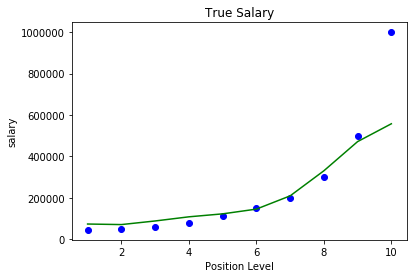

In [8]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regression.predict(X)), color = 'green')
plt.title("True Salary")
plt.xlabel("Position Level")
plt.ylabel("salary")
plt.show()

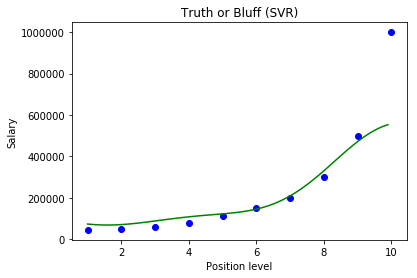

In [9]:
#high ressolution

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(X_grid, sc_y.inverse_transform(regression.predict(sc_X.transform(X_grid))), color = 'green')
plt.title('True Salary')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()